In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install folium


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# 한글 오류 안 뜨게 함
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

In [7]:
!pip install xgboost

     --------------------------------------- 89.1/89.1 MB 19.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 9.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score
# from xgboost import XGBClassifier
import xgboost
from collections import defaultdict
import pickle
import shap
import matplotlib.pyplot as plt
import os


df = pd.read_csv('enc_not_stand_ch (1).csv',index_col=0)
y = df.사건
x = df.drop('사건',axis=1)

In [12]:
# 모델1. xgboost
# 모델 학습 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=1004)
xgb1 = xgboost.XGBClassifier(
        learning_rate =0.7,
        n_estimators=1000,
        max_depth=9,
        gamma=0,
        subsample=0.5,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=-1,
        scale_pos_weight=1,
        seed=1024
    )

print(X_test.shape)
print(y_test.shape)
# X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5,random_state=1004)

xgb1.fit(X_train,y_train)

y_pred = xgb1.predict(X_test)
explainer = shap.Explainer(xgb1)
shapvalues = explainer(X_train)



(20015, 84)
(20015,)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


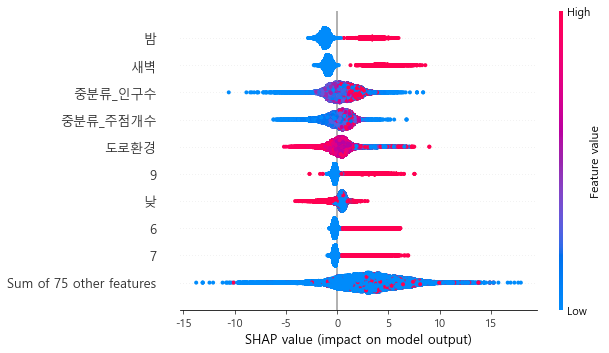

acc:  0.81923557332001
recall:  0.2870233520543896
집현동         3.362824
부강면         2.951961
예산군         2.896362
동구          2.886386
서천군         2.627464
              ...   
Saturday    1.539004
해밀동         1.514849
합강동         1.464594
휴일          1.448812
전의면         1.077140
Name: 0, Length: 76, dtype: float64


<Figure size 432x288 with 0 Axes>

In [17]:
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

plt.rcParams['font.family'] = 'Malgun Gothic'
plot = shap.plots.beeswarm(shapvalues)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.savefig('shap_xg.png')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)

print('acc: ',accuracy)
print('recall: ',recall)

importance =xgb1.get_booster().get_score(importance_type='gain')

# Print the feature importance scores in descending order
fi = dict()
for feature, score in sorted(importance.items(), key=lambda x: x[1], reverse=True):
    # print(f'{feature}: {score}')
    fi[feature] = score

index_list = list(range(len(fi)))
fis = pd.DataFrame(fi,index = index_list)
print(fis.iloc[0,:])
fis.to_csv('fi.csv',encoding = 'utf-8-sig')